In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Name of the model
nome = "pre-sint"
model_dir = f"modelli/{nome}"

In [2]:
# Import validation data on the fine-tuning phase
try:
    with open(f"{model_dir}/val_loss_tune.txt", "r") as f:
        fineV_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc_tune.txt", "r") as f:
        fineV_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Fine-tuning data not found.")

In [3]:
# Import validation data on the training phase
try:
    with open(f"{model_dir}/val_loss.txt", "r") as f:
        val_loss = [float(line.strip()) for line in f.readlines()]
        
    with open(f"{model_dir}/val_acc.txt", "r") as f:
        val_acc = [float(line.strip()) for line in f.readlines()]
    
except:
    print("Validation data not found.")

## Plotting loss and accuracy during fine-tuning

[1.369059681892395, 1.3450307846069336, 1.3070929050445557, 1.2848165035247803, 1.2836990356445312, 1.249832034111023, 1.2183566093444824, 1.204498052597046, 1.2071092128753662, 1.202289342880249, 1.0731399059295654, 0.9954264163970947, 0.936694860458374, 0.893957257270813, 0.8347816467285156, 0.7957990765571594, 0.7400829195976257, 0.7036078572273254, 0.6626490354537964, 0.63006192445755, 0.5968084335327148, 0.5813173055648804, 0.5664743781089783, 0.5424388647079468, 0.5150675773620605, 0.5101604461669922, 0.49308905005455017, 0.5034090876579285, 0.48665449023246765, 0.49441614747047424, 0.4793197810649872, 0.47651198506355286, 0.4719141721725464, 0.4647485613822937, 0.4761680066585541, 0.4842180907726288, 0.49371403455734253, 0.48775994777679443, 0.4891625642776489]


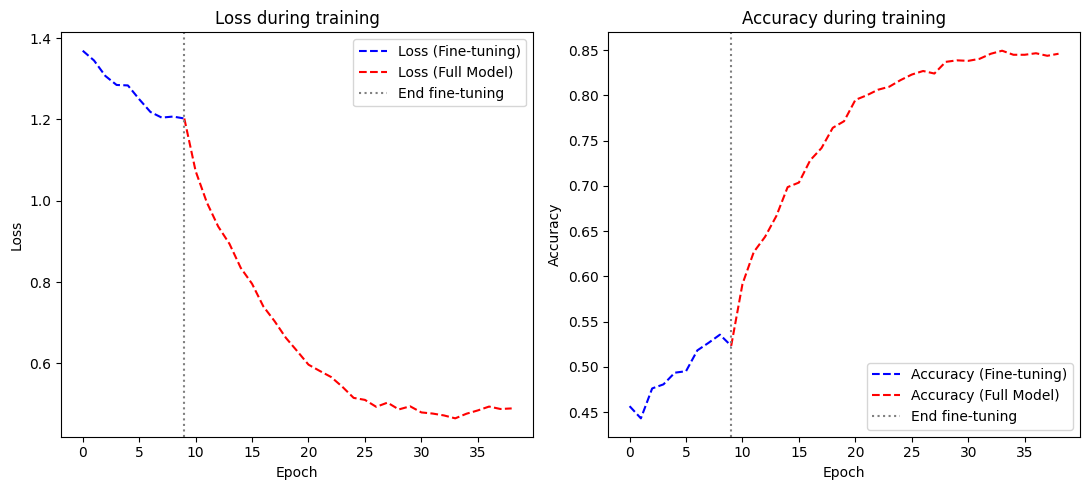

In [4]:
all_loss = fineV_loss + val_loss
all_acc = fineV_acc + val_acc
fig, ax = plt.subplots(1, 2, figsize=(11, 5))
print(all_loss)

# Epochs and split point
total_epochs = len(all_loss)
x = range(total_epochs)
split_point = len(fineV_loss)

# Loss plot
ax[0].plot(x[:split_point], all_loss[:split_point], color='blue', linestyle='--', label='Loss (Fine-tuning)')
ax[0].plot(x[split_point-1:], all_loss[split_point-1:], color='red', linestyle='--', label='Loss (Full Model)')

# Vertical line
ax[0].axvline(x=split_point-1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss during training')
ax[0].legend()

# Accuracy plot
ax[1].plot(x[:split_point], all_acc[:split_point], color='blue', linestyle='--', label='Accuracy (Fine-tuning)')
ax[1].plot(x[split_point-1:], all_acc[split_point-1:], color='red', linestyle='--', label='Accuracy (Full Model)')

# Vertical line
ax[1].axvline(x=split_point-1, color='gray', linestyle=':', label='End fine-tuning')

# Labels and title
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy during training')
ax[1].legend()

fig.tight_layout()
plt.show()

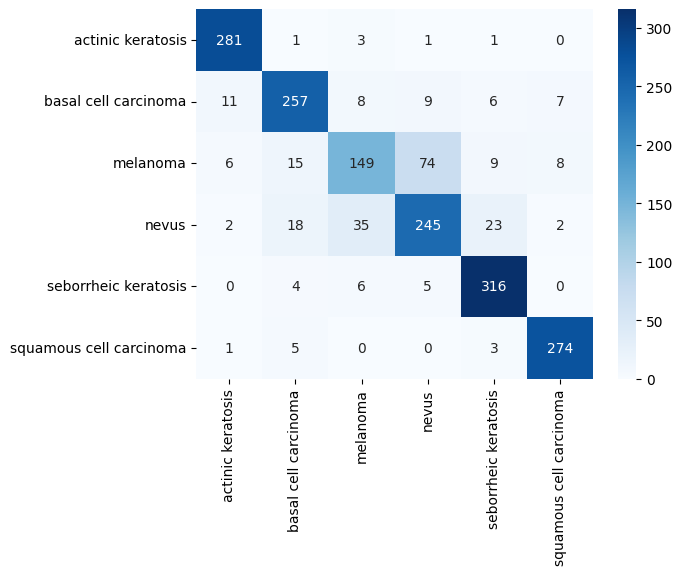

In [5]:
# Get confusion matrix
confusion_matrix_data = np.array(
    [[281,   1,   3,   1,   1,   0],
     [ 11, 257,   8,   9,   6,   7],
     [  6,  15, 149,  74,   9,   8],
     [  2,  18,  35, 245,  23,   2],
     [  0,   4,   6,   5, 316,   0],
     [  1,   5,   0,   0,   3, 274]]
)

# Classes in the correct order
class_labels = [
    'actinic keratosis',
    'basal cell carcinoma',
    'melanoma',
    'nevus',
    'seborrheic keratosis',
    'squamous cell carcinoma'
]

# Plot heatmap
plt.figure()
sns.heatmap(confusion_matrix_data, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.show()